In [1]:
from ipywidgets import interact
from discopy import *

_print = lambda circuit: print(str(circuit).replace('>>', '\n>>'))

In [2]:
def inormalize(diagram):
    steps = [diagram] + list(diagram.normalize())
    @interact
    def widget(step=(0, len(steps) - 1, 1)):
        steps[step].draw(aspect='auto')

In [3]:
x, y = Ty('x'), Ty('y')
d = Box('f', x, x @ y) @ Id(x) >> Id(x) @ Box('g', y @ x, x)
diagram = (d @ d.dagger() >> d.dagger() @ d)
inormalize(diagram)

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…

In [4]:
inormalize(moncat.build_spiral(3))

interactive(children=(IntSlider(value=28, description='step', max=56), Output()), _dom_classes=('widget-intera…

In [5]:
a, b, c, d = Ty('a'), Ty('b'), Ty('c'), Ty('d')
snake = Box('f', a @ b, c @ d)\
    .transpose_l().transpose_l()\
    .transpose_r().transpose_r()\
    .transpose_l().transpose_r()
inormalize(snake)

interactive(children=(IntSlider(value=50, description='step', max=101), Output()), _dom_classes=('widget-inter…

In [6]:
s, n = Ty('s'), Ty('n')
Alice, Bob = Word('Alice', n), Word('Bob', n)
loves_box = Box('loves', n @ n, s)
loves = Cap(n.r, n) @ Cap(n, n.l)\
    >> Id(n.r) @ loves_box @ Id(n.l)
grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
sentence = Alice @ loves @ Bob >> grammar
inormalize(sentence)

interactive(children=(IntSlider(value=3, description='step', max=7), Output()), _dom_classes=('widget-interact…

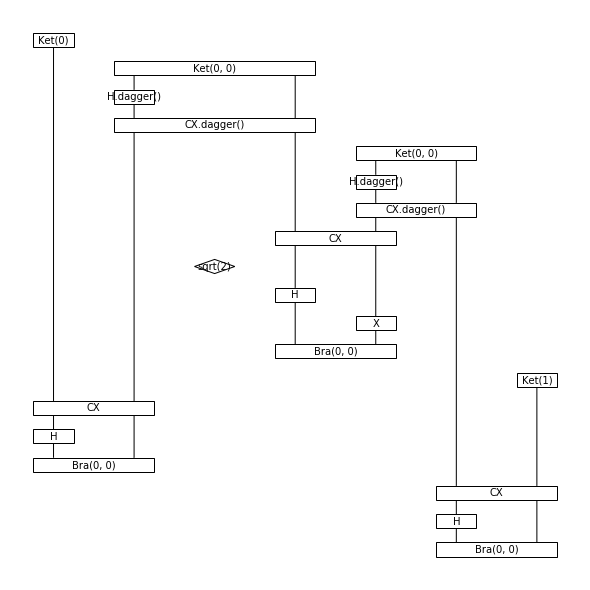

In [15]:
loves_ansatz = circuit.CX\
    >> circuit.sqrt(2) @ circuit.H @ circuit.X\
    >> Bra(0, 0)
ob = {s: 0, n: 1}
ar = {Alice: Ket(0), loves_box: loves_ansatz, Bob: Ket(1)}
F = CircuitFunctor(ob, ar)
F(sentence).draw(aspect='auto', figsize=(8, 8))

In [8]:
print("Autonomising before applying the functor:")
_print(F(sentence.normal_form()))

Autonomising before applying the functor:
Ket(0) 
>> Id(1) @ Ket(1) 
>> CX 
>> sqrt(2) @ Id(2) 
>> H @ Id(1) 
>> Id(1) @ X 
>> Bra(0, 0)


In [9]:
assert F(sentence).eval() == F(sentence.normal_form()).eval()

In [10]:
Eckmann_Hilton = Box('s0', Ty(), Ty()) @ Box('s1', Ty(), Ty())
try:
    Eckmann_Hilton.normal_form()
except NotImplementedError as err:
    print("NotImplementedError(\"{}\")".format(err))

NotImplementedError("s0 >> s1 is not connected.")


In [11]:
gen = Eckmann_Hilton.normalize()
for _ in range(5):
    print(next(gen))
print('...')

s1 >> s0
s0 >> s1
s1 >> s0
s0 >> s1
s1 >> s0
...
